In [1]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
space_df = pd.read_csv('space_titanic.csv')

In [3]:
space_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
space_df.columns = [column.lower() for column in space_df.columns]
space_df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
space_df = space_df.dropna()

In [7]:
cols_to_drop = ['cabin', 'passengerid', 'name']

space_df.drop(columns = cols_to_drop, inplace=True)

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_50193/2485448731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_df.drop(columns = cols_to_drop, inplace=True)


In [8]:
space_df

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [9]:
dummies = pd.get_dummies(space_df[['homeplanet', 'destination']], drop_first = True)

In [10]:
space_df = pd.concat([space_df, dummies], axis = 1)

In [11]:
space_df.drop(columns = ['homeplanet', 'destination'], inplace = True)

space_df.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [12]:
space_df['transported']= np.where(space_df['transported']== True, 'True', 'False')


In [13]:
train, val, test = prepare.train_val_test(space_df,'transported')

In [14]:
train

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
2687,False,42.0,False,44.0,0.0,3648.0,0.0,9.0,True,0,1,0,1
3068,False,26.0,False,0.0,1638.0,0.0,476.0,226.0,False,1,0,0,1
1805,True,24.0,False,0.0,0.0,0.0,0.0,0.0,True,1,0,0,0
6427,False,9.0,False,0.0,0.0,0.0,0.0,0.0,True,0,0,0,1
653,False,0.0,False,0.0,0.0,0.0,0.0,0.0,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,22.0,False,0.0,442.0,0.0,0.0,368.0,True,0,0,0,1
8532,False,47.0,False,0.0,0.0,16.0,3.0,854.0,False,0,0,0,1
7498,True,23.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0,1
2355,False,23.0,False,0.0,9.0,292.0,35.0,349.0,True,0,0,1,0


In [15]:
x_train = train.drop(columns = ['transported'])
y_train = train['transported']

x_val = val.drop(columns = ['transported'])
y_val = val['transported']

x_test = test.drop(columns = ['transported'])
y_test = test['transported']

In [16]:
x_train.shape
x_train.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
2687,False,42.0,False,44.0,0.0,3648.0,0.0,9.0,0,1,0,1
3068,False,26.0,False,0.0,1638.0,0.0,476.0,226.0,1,0,0,1
1805,True,24.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0
6427,False,9.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0,1
653,False,0.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,1


In [17]:
seed = 42

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [18]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
clf.score(x_train, y_train)

0.7571366782006921

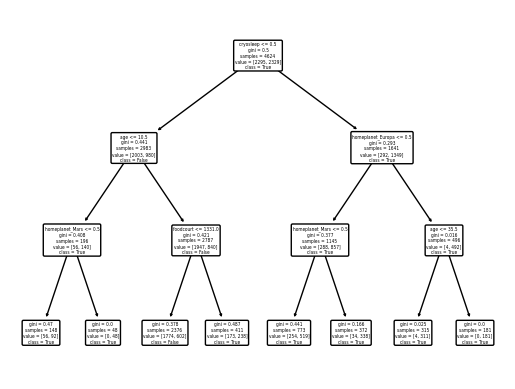

In [20]:
plot_tree(clf, feature_names = x_train.columns, class_names = clf.classes_, rounded = True)
plt.show()

In [21]:
val_preds = clf.predict(x_val)

In [22]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

       False       0.72      0.77      0.74       492
        True       0.76      0.71      0.73       499

    accuracy                           0.74       991
   macro avg       0.74      0.74      0.74       991
weighted avg       0.74      0.74      0.74       991



In [23]:
clf.score(x_train, y_train)

0.7571366782006921

In [24]:
big_clf = DecisionTreeClassifier(max_depth = 10, random_state = 99)

In [25]:
big_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=99)

In [26]:
big_clf.score(x_train, y_train)

0.8451557093425606

In [27]:
big_clf.score(x_val, y_val)

0.7487386478304743

#random forest

ensemble:
    a techniqe that combines many models
    
Bootstrapping:
    random sampling of the train dataset and using different samples to train each tree
Aggregation:
    the combination of predictions from all trees to make one final pred
    
Bagging:
    'buh-agging'... ok

In [28]:
seed = 42

rf = RandomForestClassifier(max_depth = 3, random_state = seed, max_samples = 0.5)

In [29]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, max_samples=0.5, random_state=42)

In [30]:
rf.score(x_train, y_train)

0.7504325259515571

In [31]:
rf.score(x_val, y_val)

0.7346115035317861

In [32]:
rf.feature_importances_

array([3.23776000e-01, 1.98248168e-02, 2.05696355e-04, 1.29183022e-01,
       6.39690467e-02, 9.56128821e-02, 1.49352099e-01, 1.64574234e-01,
       3.96487884e-02, 1.03530149e-02, 8.52614517e-04, 2.64778448e-03])

In [33]:
x_train.columns

Index(['cryosleep', 'age', 'vip', 'roomservice', 'foodcourt', 'shoppingmall',
       'spa', 'vrdeck', 'homeplanet_Europa', 'homeplanet_Mars',
       'destination_PSO J318.5-22', 'destination_TRAPPIST-1e'],
      dtype='object')

In [34]:
importance_df = pd.DataFrame({'feature': x_train.columns.tolist(), 
              'importance': rf.feature_importances_})

In [35]:
importance_df.sort_values('importance', ascending = False)

,feature,importance
0,cryosleep,0.323776
7,vrdeck,0.164574
6,spa,0.149352
3,roomservice,0.129183
5,shoppingmall,0.095613
4,foodcourt,0.063969
8,homeplanet_Europa,0.039649
1,age,0.019825
9,homeplanet_Mars,0.010353
11,destination_TRAPPIST-1e,0.002648


In [36]:
x_train['vip'].value_counts()

False    4526
True       98
Name: vip, dtype: int64

In [37]:
rf.score(x_val, y_val)

0.7346115035317861

In [38]:
rf2 = RandomForestClassifier(n_estimators = 200, max_depth = 5, 
                             random_state = seed, max_samples = .33)

In [39]:
rf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=0.33, n_estimators=200,
                       random_state=42)

In [40]:
rf2.score(x_train, y_train)

0.7993079584775087

In [41]:
rf2.score(x_val, y_val)

0.7780020181634713

In [42]:
train_preds = rf2.predict(x_train)

In [43]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

       False       0.78      0.82      0.80      2295
        True       0.82      0.78      0.80      2329

    accuracy                           0.80      4624
   macro avg       0.80      0.80      0.80      4624
weighted avg       0.80      0.80      0.80      4624



In [44]:


for i in range(3,11):
    rf = RandomForestClassifier(max_depth = i, 
                                random_state = seed, max_samples = 0.5)
    rf.fit(x_train, y_train)
    train_acc = rf.score(x_train, y_train)
    val_acc = rf.score(x_val, y_val)
    print(f'Max depth of {i}. Train Accuracy: {train_acc}. Validation accuracy: {val_acc}.')
    print()
    print('--------------------------')
    print()

Max depth of 3. Train Accuracy: 0.7504325259515571. Validation accuracy: 0.7346115035317861.

--------------------------

Max depth of 4. Train Accuracy: 0.7798442906574394. Validation accuracy: 0.7608476286579213.

--------------------------

Max depth of 5. Train Accuracy: 0.8016868512110726. Validation accuracy: 0.7669021190716448.

--------------------------

Max depth of 6. Train Accuracy: 0.8090397923875432. Validation accuracy: 0.7780020181634713.

--------------------------

Max depth of 7. Train Accuracy: 0.8233131487889274. Validation accuracy: 0.7830474268415741.

--------------------------

Max depth of 8. Train Accuracy: 0.8334775086505191. Validation accuracy: 0.786074672048436.

--------------------------

Max depth of 9. Train Accuracy: 0.8414792387543253. Validation accuracy: 0.7769929364278506.

--------------------------

Max depth of 10. Train Accuracy: 0.8527249134948097. Validation accuracy: 0.7820383451059536.

--------------------------



## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [48]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
knn.score(x_train,y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8261245674740484

In [50]:
knn.score(x_val, y_val)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.763874873864783

In [53]:
num_neighbors = []
train_acc = []
val_acc = []

for i in range (1,11, 2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    num_neighbors.append(i)
    train_acc.append(knn.score(x_train, y_train))
    val_acc.append(knn.score(x_val, y_val))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [54]:
pd.DataFrame({'neighbors': num_neighbors,
             'train_acc': train_acc,
             'val_acc': val_acc})

,neighbors,train_acc,val_acc
0,1,0.919118,0.721493
1,3,0.845804,0.743693
2,5,0.826125,0.763875
3,7,0.818555,0.773966
4,9,0.811419,0.765893


In [ ]:
train_preds = knn.predict(x_train)

In [55]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

       False       0.78      0.82      0.80      2295
        True       0.82      0.78      0.80      2329

    accuracy                           0.80      4624
   macro avg       0.80      0.80      0.80      4624
weighted avg       0.80      0.80      0.80      4624

